# 1) Load test_predictions (energy / azimuth / zenith)


In [1]:

from pathlib import Path
import pandas as pd


In [3]:

base = Path.cwd().resolve().parent  # .../initiative2

energy_path  = sorted((base / "energy").rglob("test_predictions*.csv"))[0]
azimuth_path = sorted((base / "azimuth").rglob("test_predictions*.csv"))[0]
zenith_path  = sorted((base / "zenith").rglob("test_predictions*.csv"))[0]

energy_df  = pd.read_csv(energy_path)
az_df      = pd.read_csv(azimuth_path)
zen_df     = pd.read_csv(zenith_path)




In [4]:
print("ENERGY :", energy_path.name,  energy_df.shape)
print("AZIMUTH:", azimuth_path.name, az_df.shape)
print("ZENITH :", zenith_path.name,  zen_df.shape)

print("\nENERGY cols :", list(energy_df.columns))
print("AZIMUTH cols:", list(az_df.columns))
print("ZENITH cols :", list(zen_df.columns))



ENERGY : test_predictions.csv (41311, 7)
AZIMUTH: test_predictions.csv (41311, 11)
ZENITH : test_predictions.csv (41311, 8)

ENERGY cols : ['true_energy', 'pred_energy', 'pred_log10_energy', 'true_log10_energy', 'residual_log10', 'residual', 'event_id']
AZIMUTH cols: ['true_azimuth_radian', 'pred_azimuth_radian', 'true_azimuth_degree', 'pred_azimuth_degree', 'true_azimuth_degree_signed', 'pred_azimuth_degree_signed', 'pred_azimuth_degree_adj', 'kappa', 'event_id', 'residual_azimuth_radian', 'residual_azimuth_degree']
ZENITH cols : ['true_zenith_radian', 'pred_zenith_radian', 'true_zenith_degree', 'pred_zenith_degree', 'kappa', 'event_id', 'residual_zenith_radian', 'residual_zenith_degree']


In [5]:
display(energy_df.head(2))


,true_energy,pred_energy,pred_log10_energy,true_log10_energy,residual_log10,residual,event_id
0,108859.773438,1304.831177,3.115554,5.036868,-1.921313,-107554.945312,242
1,14684.890625,26424.460938,4.422006,4.166871,0.255136,11739.570312,778


In [6]:
display(az_df.head(2))


,true_azimuth_radian,pred_azimuth_radian,true_azimuth_degree,pred_azimuth_degree,true_azimuth_degree_signed,pred_azimuth_degree_signed,pred_azimuth_degree_adj,kappa,event_id,residual_azimuth_radian,residual_azimuth_degree
0,4.139313,3.670218,237.165146,210.288010,-122.834846,-149.711990,210.288010,1.444075,242,-0.469095,-26.877136
1,5.674534,5.704504,325.126831,326.844025,-34.873158,-33.155994,326.844025,91.555046,778,0.029971,1.717192


In [7]:
display(zen_df.head(2))

,true_zenith_radian,pred_zenith_radian,true_zenith_degree,pred_zenith_degree,kappa,event_id,residual_zenith_radian,residual_zenith_degree
0,0.390769,0.897717,22.389387,51.435383,12.699632,242,0.506948,29.045994
1,1.441897,1.430777,82.614624,81.977478,102.253052,778,-0.011120,-0.637147


# 2) Merge test_predictions into one table (energy + azimuth + zenith)


In [12]:
# Common columns check (just for visibility)
common_cols = set(energy_df.columns) & set(az_df.columns) & set(zen_df.columns)
print("Common columns (all 3):", sorted(common_cols))

# pick a merge key (common in GraphNeT exports)
merge_key = None
for k in ["event_id", "event_no", "event", "idx", "index"]:
    if k in common_cols:
        merge_key = k
        break
print("Chosen merge key:", merge_key)

# --- suffix ALL columns from azimuth/zenith (except merge key) ---
az_df2 = az_df.copy()
zen_df2 = zen_df.copy()

if merge_key is not None:
    az_df2.columns  = [c if c == merge_key else f"{c}_AZ"  for c in az_df2.columns]
    zen_df2.columns = [c if c == merge_key else f"{c}_ZEN" for c in zen_df2.columns]

if merge_key is None:
    # fallback: assume same row order (not ideal)
    df = pd.concat(
        [energy_df, az_df.add_suffix("_AZ"), zen_df.add_suffix("_ZEN")],
        axis=1,
    )
else:
    df = energy_df.merge(az_df2, on=merge_key, how="inner")
    df = df.merge(zen_df2, on=merge_key, how="inner")

print("Merged df shape:", df.shape)
print("\nColumns:")
for c in df.columns:
    print(c)

display(df.head(3))


Common columns (all 3): ['event_id']
Chosen merge key: event_id
Merged df shape: (41311, 24)

Columns:
true_energy
pred_energy
pred_log10_energy
true_log10_energy
residual_log10
residual
event_id
true_azimuth_radian_AZ
pred_azimuth_radian_AZ
true_azimuth_degree_AZ
pred_azimuth_degree_AZ
true_azimuth_degree_signed_AZ
pred_azimuth_degree_signed_AZ
pred_azimuth_degree_adj_AZ
kappa_AZ
residual_azimuth_radian_AZ
residual_azimuth_degree_AZ
true_zenith_radian_ZEN
pred_zenith_radian_ZEN
true_zenith_degree_ZEN
pred_zenith_degree_ZEN
kappa_ZEN
residual_zenith_radian_ZEN
residual_zenith_degree_ZEN


,true_energy,pred_energy,pred_log10_energy,true_log10_energy,residual_log10,residual,event_id,true_azimuth_radian_AZ,pred_azimuth_radian_AZ,true_azimuth_degree_AZ,...,kappa_AZ,residual_azimuth_radian_AZ,residual_azimuth_degree_AZ,true_zenith_radian_ZEN,pred_zenith_radian_ZEN,true_zenith_degree_ZEN,pred_zenith_degree_ZEN,kappa_ZEN,residual_zenith_radian_ZEN,residual_zenith_degree_ZEN
0,108859.773438,1304.831177,3.115554,5.036868,-1.921313,-107554.945312,242,4.139313,3.670218,237.165146,...,1.444075,-0.469095,-26.877136,0.390769,0.897717,22.389387,51.435383,12.699632,0.506948,29.045994
1,14684.890625,26424.460938,4.422006,4.166871,0.255136,11739.570312,778,5.674534,5.704504,325.126831,...,91.555046,0.029971,1.717192,1.441897,1.430777,82.614624,81.977478,102.253052,-0.011120,-0.637147
2,127.363152,229.665329,2.361095,2.105044,0.256052,102.302177,1171,1.370334,1.463580,78.514381,...,87.435936,0.093246,5.342587,1.758793,1.693512,100.771446,97.031097,95.955757,-0.065281,-3.740348


In [13]:
# List merged column names
print(f"Total columns: {len(df.columns)}\n")
for c in df.columns:
    print(c)


Total columns: 24

true_energy
pred_energy
pred_log10_energy
true_log10_energy
residual_log10
residual
event_id
true_azimuth_radian_AZ
pred_azimuth_radian_AZ
true_azimuth_degree_AZ
pred_azimuth_degree_AZ
true_azimuth_degree_signed_AZ
pred_azimuth_degree_signed_AZ
pred_azimuth_degree_adj_AZ
kappa_AZ
residual_azimuth_radian_AZ
residual_azimuth_degree_AZ
true_zenith_radian_ZEN
pred_zenith_radian_ZEN
true_zenith_degree_ZEN
pred_zenith_degree_ZEN
kappa_ZEN
residual_zenith_radian_ZEN
residual_zenith_degree_ZEN


# 3) Compute opening angle (Δψ) from (zenith, azimuth)


In [ ]:
# Δψ = arccos( u_true · u_pred ), with u = (sinθ cosφ, sinθ sinφ, cosθ)


# pick columns
th_true = df["true_zenith_radian_ZEN"].to_numpy()
ph_true = df["true_azimuth_radian_AZ"].to_numpy()
th_pred = df["pred_zenith_radian_ZEN"].to_numpy()
ph_pred = df["pred_azimuth_radian_AZ"].to_numpy()

# unit vectors (true)
ux_t = np.sin(th_true) * np.cos(ph_true)
uy_t = np.sin(th_true) * np.sin(ph_true)
uz_t = np.cos(th_true)

# unit vectors (pred)
ux_p = np.sin(th_pred) * np.cos(ph_pred)
uy_p = np.sin(th_pred) * np.sin(ph_pred)
uz_p = np.cos(th_pred)

# dot + clip for numerical safety
dot = ux_t*ux_p + uy_t*uy_p + uz_t*uz_p
dot = np.clip(dot, -1.0, 1.0)

# opening angle
df["opening_angle_rad"] = np.arccos(dot)
df["opening_angle_deg"] = np.degrees(df["opening_angle_rad"])

print("opening_angle_deg summary:")
display(df["opening_angle_deg"].describe(percentiles=[0.5, 0.68, 0.9, 0.95, 0.99]))


opening_angle_deg summary:


count    41311.000000
mean         9.342585
std         16.451351
min          0.013139
50%          3.717945
68%          6.559512
90%         22.760465
95%         38.141500
99%         89.537007
max        178.434996
Name: opening_angle_deg, dtype: float64

# 4) Angular resolution: median opening angle (Δψ) vs true energy


/tmp/ipykernel_1716703/2480301108.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  q = df.groupby("logE_bin")["opening_angle_deg"].quantile([0.16, 0.50, 0.84]).unstack()
/tmp/ipykernel_1716703/2480301108.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  q["n"] = df.groupby("logE_bin")["opening_angle_deg"].size()


,q16,q50,q84,logE_center,n
0,2.995943,7.705426,27.017677,2.1245,8472
1,2.023751,5.190293,19.048444,2.3750,6497
2,1.589391,3.934864,14.359219,2.6250,5129
3,1.348579,3.199354,10.844701,2.8750,4128
4,1.172271,2.717947,9.214651,3.1250,3584
5,1.109240,2.495944,7.395682,3.3750,2956
6,1.024769,2.322247,7.235837,3.6250,2463
7,0.980416,2.132910,6.437325,3.8750,1866
8,0.944267,2.134757,6.420726,4.1250,1449
9,0.976884,2.182521,6.279869,4.3750,1148


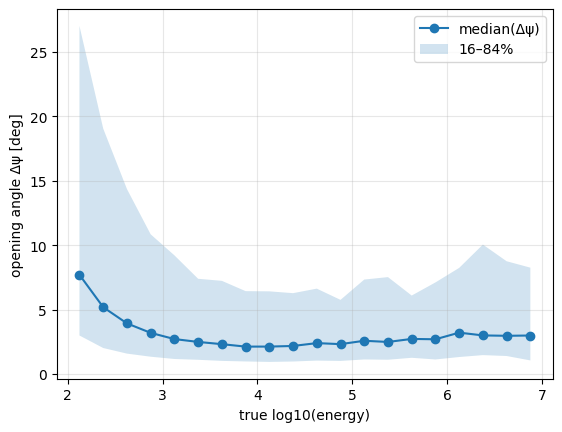

In [16]:
# We'll bin in true_log10_energy and compute q16 / median / q84 of opening_angle_deg per bin.

x = df["true_log10_energy"]
y = df["opening_angle_deg"]

bin_width = 0.25  # change to 0.2 or 0.3 if you want smoother/rougher
xmin = np.floor(x.min() / bin_width) * bin_width
xmax = np.ceil(x.max() / bin_width) * bin_width
bins = np.arange(xmin, xmax + bin_width, bin_width)

df["logE_bin"] = pd.cut(x, bins=bins, include_lowest=True)

q = df.groupby("logE_bin")["opening_angle_deg"].quantile([0.16, 0.50, 0.84]).unstack()
q.columns = ["q16", "q50", "q84"]

# bin centers + counts
q["logE_center"] = [iv.mid for iv in q.index]
q["n"] = df.groupby("logE_bin")["opening_angle_deg"].size()

# drop empty bins
q = q.dropna().reset_index(drop=True)

display(q.head(10))

# plot
if "plt" not in globals():
    import matplotlib.pyplot as plt

plt.figure()
plt.plot(q["logE_center"], q["q50"], marker="o", linestyle="-", label="median(Δψ)")
plt.fill_between(q["logE_center"], q["q16"], q["q84"], alpha=0.2, label="16–84%")

plt.xlabel("true log10(energy)")
plt.ylabel("opening angle Δψ [deg]")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


## 6) TDR-style:  Ψ_med (median opening angle) vs energy, split by sinδ


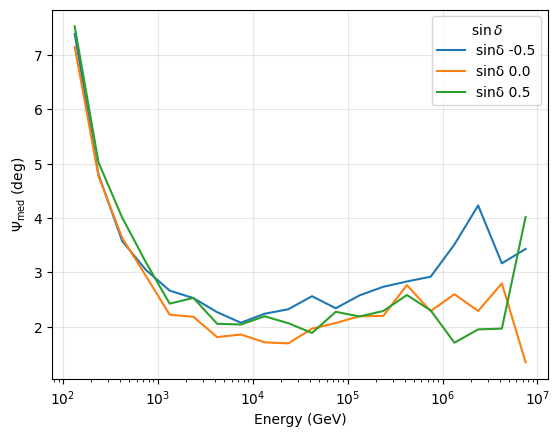

In [18]:
# In IceCube South Pole convention, an approximate mapping is: sinδ ≈ -cos(zenith)
df["sin_delta"] = -np.cos(df["true_zenith_radian_ZEN"])

# choose 3 sinδ bands centered at -0.5, 0.0, +0.5 (adjust widths if you want more stats)
sin_bands = [
    (-0.7, -0.3, -0.5),
    (-0.2,  0.2,  0.0),
    ( 0.3,  0.7,  0.5),
]

# reuse the same energy bins as before (bins variable). If you don't have it anymore, uncomment:
# bin_width = 0.25
# xmin = np.floor(df["true_log10_energy"].min() / bin_width) * bin_width
# xmax = np.ceil(df["true_log10_energy"].max() / bin_width) * bin_width
# bins = np.arange(xmin, xmax + bin_width, bin_width)

plt.figure()

for lo, hi, label in sin_bands:
    sub = df[(df["sin_delta"] >= lo) & (df["sin_delta"] < hi)].copy()
    sub["logE_bin"] = pd.cut(sub["true_log10_energy"], bins=bins, include_lowest=True)

    med = sub.groupby("logE_bin", observed=True)["opening_angle_deg"].median().dropna()
    x_logE = np.array([iv.mid for iv in med.index])
    x_E = 10**x_logE  # GeV

    plt.plot(x_E, med.values, label=f"sinδ {label}")

plt.xscale("log")
plt.xlabel("Energy (GeV)")          # rename to "Muon energy (GeV)" if that's what your truth is
plt.ylabel(r"$\Psi_{\rm med}$ (deg)")
plt.grid(True, alpha=0.3)
plt.legend(title=r"$\sin\delta$")
plt.show()
